In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, pi,sqrt
from scipy import integrate

c1 = lambda x: np.sqrt(1-(x-1.0)**2)
c2 = lambda x: 2.0 - np.sqrt(4-x**2)


#First we use in-built functions to evaluate the area integral directly so we have something to compare to
print('The area of the region computed using integrals is ')
print(integrate.quad(c1, 0, 1.6)[0]-integrate.quad(c2,0,1.6)[0])


The area of the region computed using integrals is 
0.9617391537973146


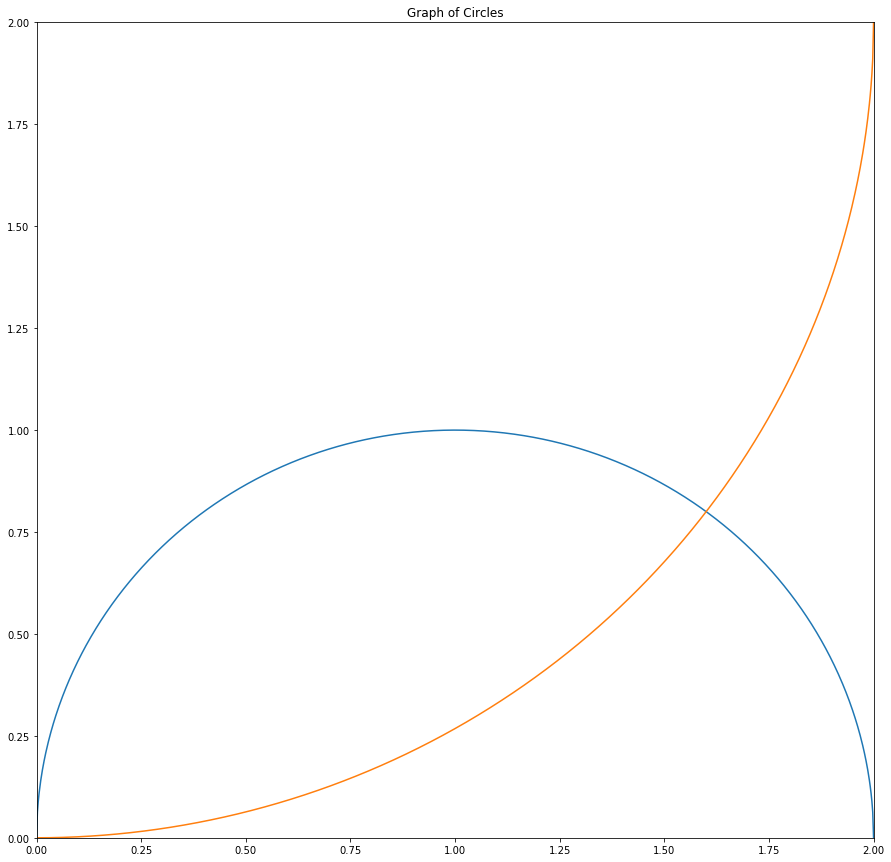

In [113]:
'''
We now set up the random number method of finding the area.
First we will graph both curves.
'''
x = np.linspace(0,2,1000)
plt.figure(figsize=(15,15))
plt.plot(x,c1(x))
plt.plot(x,c2(x))
plt.axis([0,2,0,2])
plt.title('Graph of Circles')
plt.show()

Looking at the entire square region where these curves lie, the area of this box is 4. So 4 will represent our total area.
We will now generate a bunch of random numbers and check each of them to see if they fall in the region of interest.

In [114]:
'''
Here we define the function that carries out the Monte Carlo integration for our region of interest
'''

from random import random

def MonteCarlo(N):
    count = 0
    for i in range(N):
        x = 2*random()
        y = 2*random()
        if y<c1(x) and y>c2(x):
            count += 1
    I = 4*count/N
    return I

In [35]:
MonteCarlo(10)

0.8

In [36]:
MonteCarlo(100)

0.96

In [37]:
MonteCarlo(1000)

0.976

In [38]:
MonteCarlo(10000)

0.9624

In [39]:
MonteCarlo(100000)

0.9614

In [102]:
'''
This function will compute the standard deviation of 100 samples of the Monte Carlo integration using N random numbers
'''
def StandDev(N):
    trials = 100
    areas = np.empty((100,0))
    for n in range(trials):
        areas = np.append(areas, MonteCarlo(N))
    avg = np.sum(areas)/100
    b = areas**2
    c = np.sum(b)/100
    return c - avg**2

In [109]:
StandDev(100)

0.03086

In [110]:
StandDev(1000)

0.0024356144000002855

In [111]:
StandDev(10000)

0.00022147999999977408

In [112]:
StandDev(100000)

2.3541021439865695e-05